# Climate Projection Module

## Homework 1 : Heatwaves in a changing climate

The task consists in defining a heatwave on the basis of official IPCC definitions, and appropriating the nuances they entail. On the basis of past (reanalysis) and future (projection) data, we will explore these definitions in depth, in order to explain changes in the associated indicators and introduce sufficient elements for a detailed understanding of the scientific method for quantifying hazards, as a component of a physical risk.

Contents :
1) Work on the choice of an indicator based on observed hourly temperature series (SIRTA: same data set as for the classroom work in the first session of the module). Observation of the differences between these indicators.

2) Coding of two heatwave detection functions in a dataset, with the notion of threshold and duration of events.

3) Aggregation of previous work at annual level to look at the evolution of heatwave indicators over several years.

4) Work on projected data.

5) Go further: deepening the notion of threshold, broadening the definition to a month-dependent threshold, based on historical reanalysis timeseries.

What is expected of you is to use the available codes, complete what there is to complete, and then use all this material on the data provided to explore the specifics of heat wave evolution in the two proposed projections. You will discuss the definition issues and the difficulty of defining its various terms. To this end, you will explain the effects of the different methodological choices made, and you may propose further refinements. Feel free to recycle bits of code from the class session if you need to.

You may choose to discuss, among other things, the choice of model for projections, the choice of projection itself (RCP8.5), spatial heterogeneity between oceanic (Paris) and two-season tropical (Mumbay) climates, etc...

You will present the results of your reflections to the class at the beginning of session 2 of the Climate Projections module.

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

### 1) From hourly data to daily data, first choices

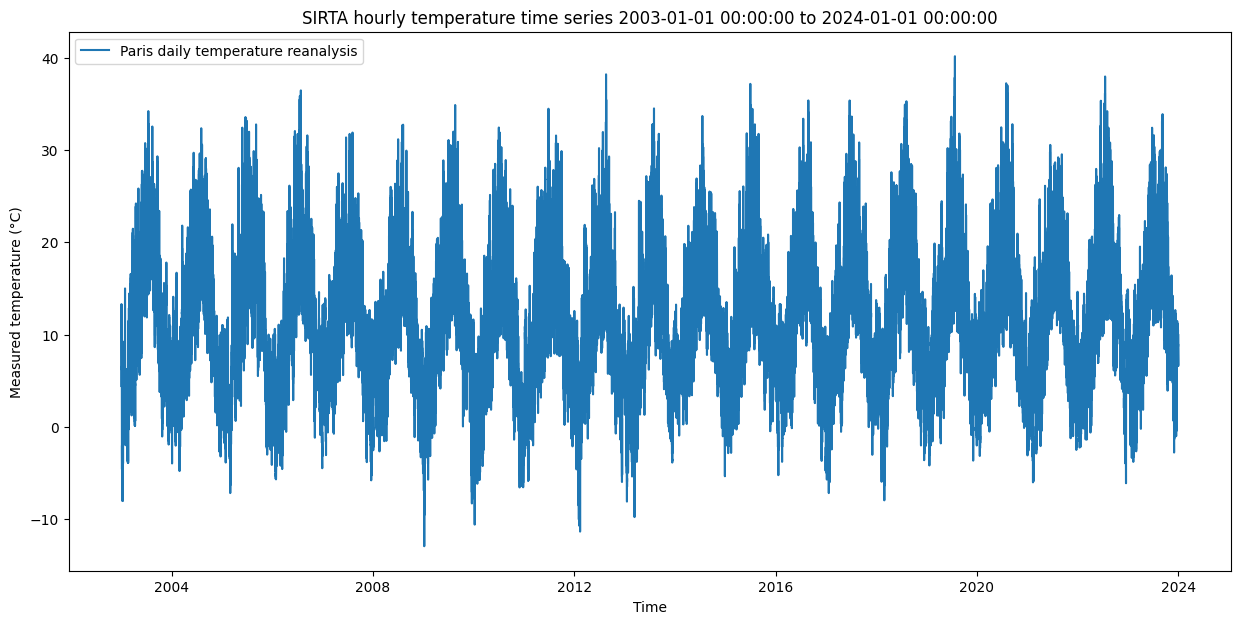

In [197]:
# Lire le fichier CSV
file_path = 'data/ta_sirta.csv'
dfs = pd.read_csv(file_path, delimiter = ",", index_col=0)
dfs.index = pd.to_datetime(dfs.index)

# Set dates - MODIFY HERE TO VARY THE CYCLES
start_time = pd.to_datetime("2003-01-01") 
end_time = pd.to_datetime("2024-01-01")  

# Filtrage des valeurs de ta entre les deux dates spécifiées
filtered_dfs = dfs[(dfs.index >= start_time) & (dfs.index < end_time)]

# Extraction des valeurs de ta
ta_filtered = filtered_dfs['ta'].values

plt.figure(figsize=(15, 7))
plt.plot(filtered_dfs.index, ta_filtered, label='Paris daily temperature reanalysis')
plt.xlabel('Time')
plt.ylabel('Measured temperature (°C)')
plt.title(f"SIRTA hourly temperature time series {start_time} to {end_time}")
plt.legend()
plt.show()

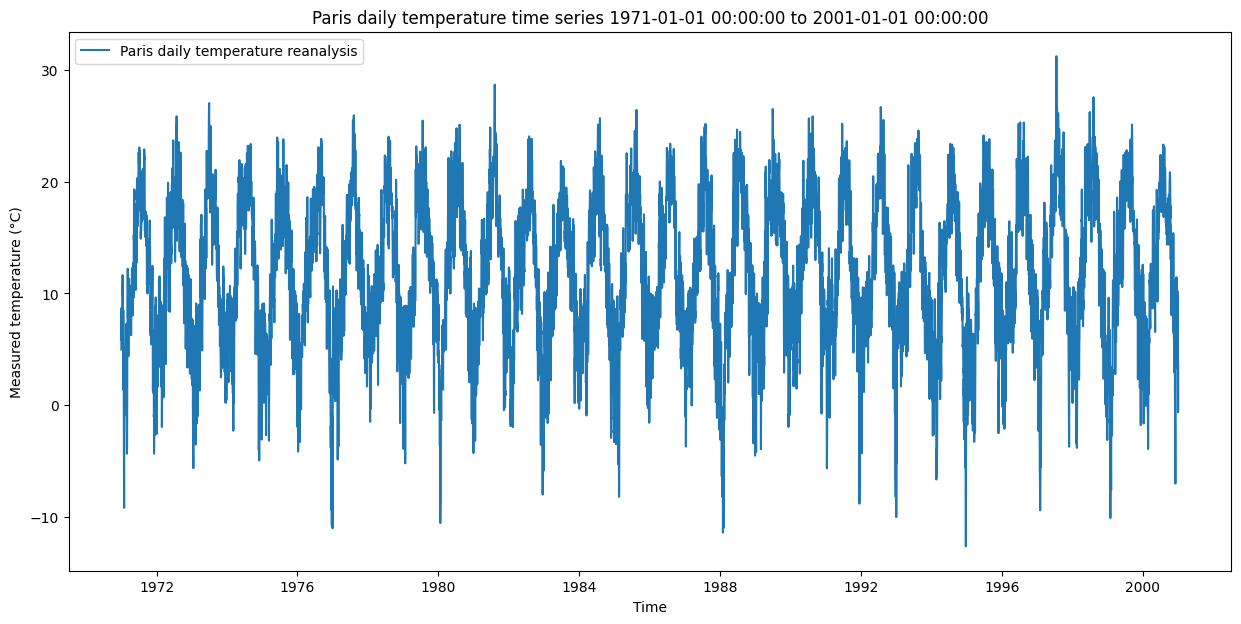

In [198]:
# Lire le fichier CSV
file_path = 'data/paris_1970_2000.csv'
dfh = pd.read_csv(file_path, delimiter = ",", index_col=0, header = None)
dfh.index = pd.to_datetime(dfh.index)
dfh.columns = ['ta']

# Set dates - MODIFY HERE TO VARY THE CYCLES
start_time = pd.to_datetime("1971-01-01") 
end_time = pd.to_datetime("2001-01-01")  

# Filtrage des valeurs de ta entre les deux dates spécifiées
filtered_dfh = dfh[(dfh.index >= start_time) & (dfh.index < end_time)]

# Extraction des valeurs de ta
ta_filteredh = filtered_dfh['ta'].values-273.15 # conversion in Celsius

plt.figure(figsize=(15, 7))
plt.plot(filtered_dfh.index, ta_filteredh, label='Paris daily temperature reanalysis')
plt.xlabel('Time')
plt.ylabel('Measured temperature (°C)')
plt.title(f"Paris daily temperature time series {start_time} to {end_time}")
plt.legend()
plt.show()

### Your turn ! 

The goal of this homework is to reflect and try to propose criteria in order to identify heatwaves on historical data. You will get the opportunity to confront your definition of heatwave on projection pathways of temperature. Many indicators of heatwaves are developped based on the wet-bulb temperature indicator, which gives information not only on the physical temperature, but also on the thermoregulation capacity of living organisms, and in particular human. For the sake of simplicity, we will work here only with the physical temperature. 

According to the [IPCC glossary](https://apps.ipcc.ch/glossary/), a heat wave is defined in the AR6 by 
> *"A period of abnormally hot weather, often defined with reference to a relative __temperature threshold__, lasting from __two days to months__. Heatwaves and warm spells have various and, in some cases, overlapping definitions."*

Write a Python function that go through a time series of temperature (365-length array of daily mean temperature at a specific location for example) and returns the number of heatwave days in a year, first according to an arbitrary threshold that you will specify. We first focus only on the threshold, not the number of consecutive days.

You are given a temperature array with hourly frequency, we first need to choose a relevant specific indicator representing well the information we need about the daily distribution of temperature, in order to specify what is a "hot weather". Would you pick the max ? the mean ?  

In [199]:
def hrly_to_dly(hourly_temperatures, ind, yr):
    """
    Counts the number of values in tas_array that are greater than the given threshold.

    Parameters:
    hourly_temperatures (list or array-like): array of hourly tas values.
    ind (string): indicator chosen, "max" or "mean"

    Returns:
    tasd_array: array of daily tas values for the selected indicator
    """
    hours_per_day = 24
    
    bisext = 1
    if yr%4:
        bisext = 0
    
    if ind == "mean":
        daily_mean_temperatures = []
        
        # Loop through each day
        for day in range(365+bisext):
            # Calculate the start and end index for the current day's temperatures
            start_index = day * hours_per_day
            end_index = start_index + hours_per_day
            # Get the temperatures for the current day
            daily_temperatures = hourly_temperatures[start_index:end_index]
            # Calculate the mean temperature for the current day
            daily_mean_temperature = sum(daily_temperatures) / hours_per_day
            daily_mean_temperatures.append(daily_mean_temperature)
        return daily_mean_temperatures
    elif ind == "max":
        daily_max_temperatures = []
        
        # Loop through each day
        for day in range(365):
            # Calculate the start and end index for the current day's temperatures
            start_index = day * hours_per_day
            end_index = start_index + hours_per_day
            # Get the temperatures for the current day
            daily_temperatures = hourly_temperatures[start_index:end_index]
            # Calculate the max temperature for the current day
            daily_max_temperature = np.max(daily_temperatures)
            daily_max_temperatures.append(daily_max_temperature)
        return daily_max_temperatures

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')


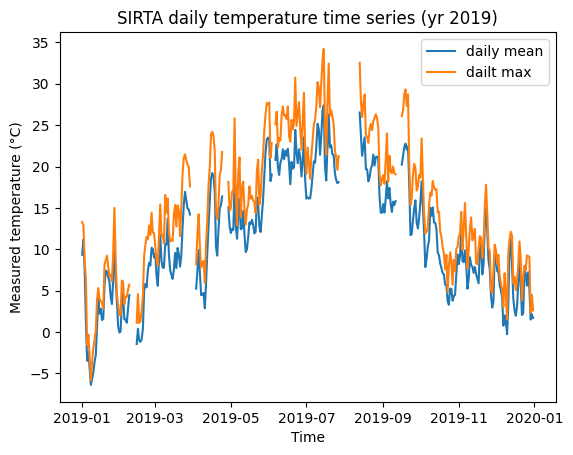

In [200]:
# Set dates - MODIFY HERE TO VARY THE CYCLES
start_time = pd.to_datetime("2019-01-01") 
end_time = pd.to_datetime("2020-01-01")

# Filtrage des valeurs de ta entre les deux dates spécifiées
filtered_dfs = dfs[(dfs.index >= start_time) & (dfs.index < end_time)]
tas = ta_filtered
ta_filtered = filtered_dfs['ta'].values
dates = filtered_dfs.index

SSTmean = hrly_to_dly(tas, "mean", yr = dates[0].year) # For 1y
SSTmax = hrly_to_dly(tas, "max", yr = dates[0].year)  # For 1y
dates = pd.date_range(start=dates[0], end=dates[-1], freq='D') 
print(dates)

plt.plot(dates, SSTmean, label='daily mean')
plt.plot(dates, SSTmax, label='dailt max')
plt.xlabel('Time')
plt.ylabel('Measured temperature (°C)')
plt.title(f"SIRTA daily temperature time series (yr {start_time.year})")
plt.legend()
plt.show()

### 2) Coding a basic threshold counting function and Consecutive heatwave days counter 

Code the following function, counting the number of day overpassing a threshold value, according to a selected indicator of daily temperature.

In [201]:

def nb_heatwaves_simple(tas_array, threshold):
    """
    Parameters:
    tas_array (list or array-like): The array of daily values
    threshold (float or int): The threshold value to compare against.

    Returns:
    int: The count of values greater than the threshold.
    """
    #FILL HERE
    return nb_hw_d

    

Let us apply this function on the 2023 Palaiseau dataset. What threshold seems relevant to you ?


In [202]:
nb_mean30 = nb_heatwaves_simple(SSTmean, 30)
nb_max30 = nb_heatwaves_simple(SSTmax, 30)

nb_mean25 = nb_heatwaves_simple(SSTmean, 25)
nb_max25 = nb_heatwaves_simple(SSTmax, 25)

print(f"For mean temperature and a threshold at 30°C : {nb_mean30} days")
print(f"For max temperature and a threshold at 30°C : {nb_max30} days")
print(f"For mean temperature and a threshold at 25°C : {nb_mean25} days")
print(f"For max temperature and a threshold at 25°C : {nb_max25} days")

For mean temperature and a threshold at 30°C : 0 days
For max temperature and a threshold at 30°C : 7 days
For mean temperature and a threshold at 25°C : 5 days
For max temperature and a threshold at 25°C : 51 days



In the IPCC definition, this threshold relates to the "normal" temperature. How would you estimate this threshold ? What does it imply ?

Let us now extend our first heatwave detection function in order to identify the "heatwave events", ie the events of overpassing a certain threshold for several days in a row.

In [203]:
def detect_heatwaves(tas_array, threshold, nb_days):
    """
    Detect heatwave events in the daily temperature array.

    Parameters:
    tas_array (list or array-like): The array of daily temperatures.
    threshold (float or int): The temperature threshold for a heatwave.
    nb_days (int): The minimum number of consecutive days for an event to be considered a heatwave.

    Returns:
    list: A list of 0s and 1s where 1 indicates a day that is part of a heatwave event.
    """
    heatwave_events = [0] * len(tas_array)

    #FILL HERE

    return heatwave_events

 Number of days belonging to a heatwave event for the parameters (30°C, 3 days) : 3 


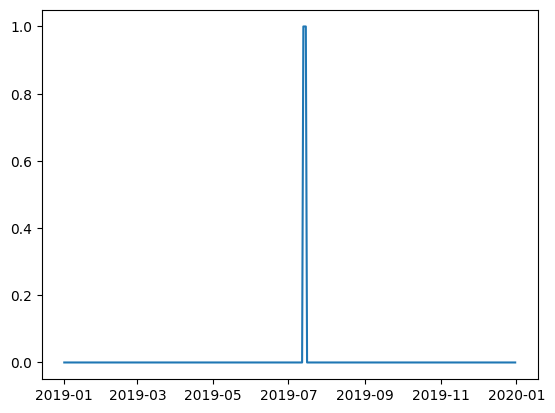

In [204]:
thresh = 30
N = 3

hwevents_max = detect_heatwaves(SSTmax, thresh, N)
print(f" Number of days belonging to a heatwave event for the parameters ({thresh}°C, {N} days) : {sum(hwevents_max)} ")
plt.plot(dates, hwevents_max)
plt.show()

Below are a few lines of code to display the temperature curve (depending on the indicator selected, average or daily maximum), together with the threshold selected, and the days belonging to heatwave days. 

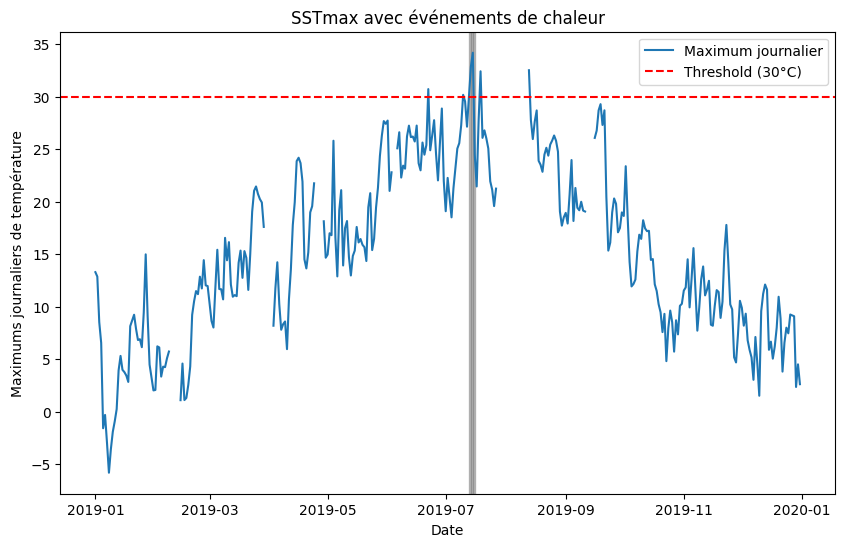

In [205]:
# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(10, 6))

# Tracé des valeurs SSTmax
ax.plot(dates, SSTmax, label='Maximum journalier')

# Tracé des valeurs SSTmean
#ax.plot(dates, SSTmean, label='Moyenne journalière')
# Ajout des zones grisées pour les jours avec événements (hwevents_max == 1)
for i, event in enumerate(hwevents_max):
    if event == 1:
        ax.axvspan(dates[i], dates[i] + pd.Timedelta(days=1), color='gray', alpha=0.5)
ax.axhline(y=thresh, color='red', linestyle='--', label=f'Threshold ({thresh}°C)')
# Ajout des labels et de la légende
ax.set_xlabel('Date')
ax.set_ylabel('Maximums journaliers de température')
ax.set_title('SSTmax avec événements de chaleur')
ax.legend()

# Affichage du graphique
plt.show()

## 3) Evolution of the number of heatwave days through the years

Now that we've developed this annual aggregate indicator close to that of the IPCC (with the difference that we reason on the basis of a fixed threshold, whereas the scientific literature tends to be based on well-chosen quantiles of historical temperatures), we can look at its evolution over several years.

In [206]:
def every_yr_hw(start_date, end_date, thresh, N):
    # Génération du DatetimeIndex
    date_range = pd.date_range(start=start_date, end=end_date, freq='YS') 

    nbhw_dys = []

    for i in range(len(date_range)-1):
        start_time = date_range[i]
        end_time = date_range[i+1]
        filtered_dfs = dfs[(dfs.index >= start_time) & (dfs.index < end_time)]
        tas = filtered_dfs['ta'].values
        SSTmax = hrly_to_dly(tas, "max", yr = date_range[i].year)
        hwevents_max = detect_heatwaves(SSTmax, thresh, N)
        nbhw_dys.append(sum(hwevents_max))

    plt.plot(date_range[:-1], nbhw_dys)
    plt.title(f"Number of heatwave days per year for a threshold of {thresh}°C overpassed for {N} consecutive days, for the period {start_date.year}-{end_date.year}")
    plt.show()



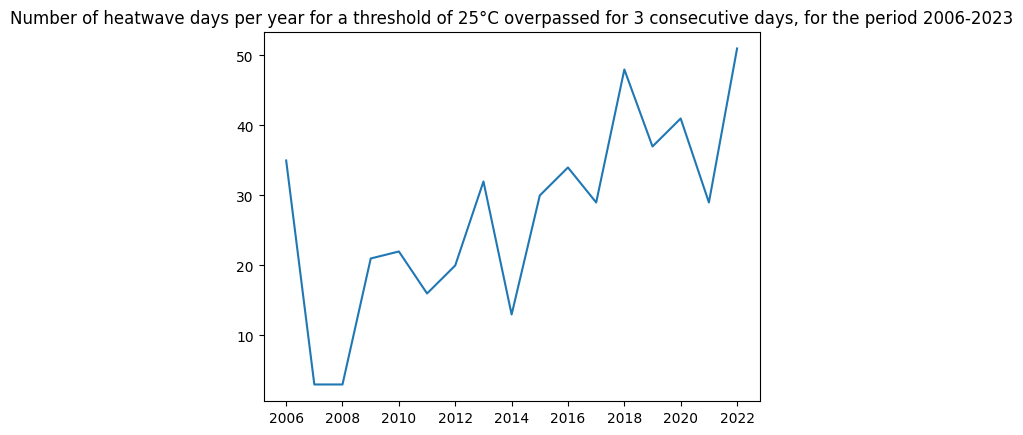

In [207]:
thresh = 25
N = 3

# Définition des dates de début et de fin
start_date = pd.to_datetime("2006-01-01 00:00:00")
end_date = pd.to_datetime("2023-01-01 00:00:00")
every_yr_hw(start_date, end_date, thresh, N)

## 4) Projections

Up to now, we've essentially reasoned on the basis of past temperature data. Let's now turn our attention to projection data. To do this, we'll be working on a series of projections based on the RCP8.5 scenario (leading to temperatures close to +4°C by 2100). In addition, to get a broader picture of the heterogeneous impact across the world, we'll base ourselves on two projections: one for the area corresponding to Paris, France, and the other for the area corresponding to Mumbai, India. Note that we'll be working here on data from just one model, IPSL's CM5 model, which is developed by the francilian Climate Modelling Center.

The data has been retrieved using the ISIMIP "tas_day_IPSL-CM5A-LR_rcp85_r1i1p1_EWEMBI" indicator for RCP8.5, with the *configure download* tool.

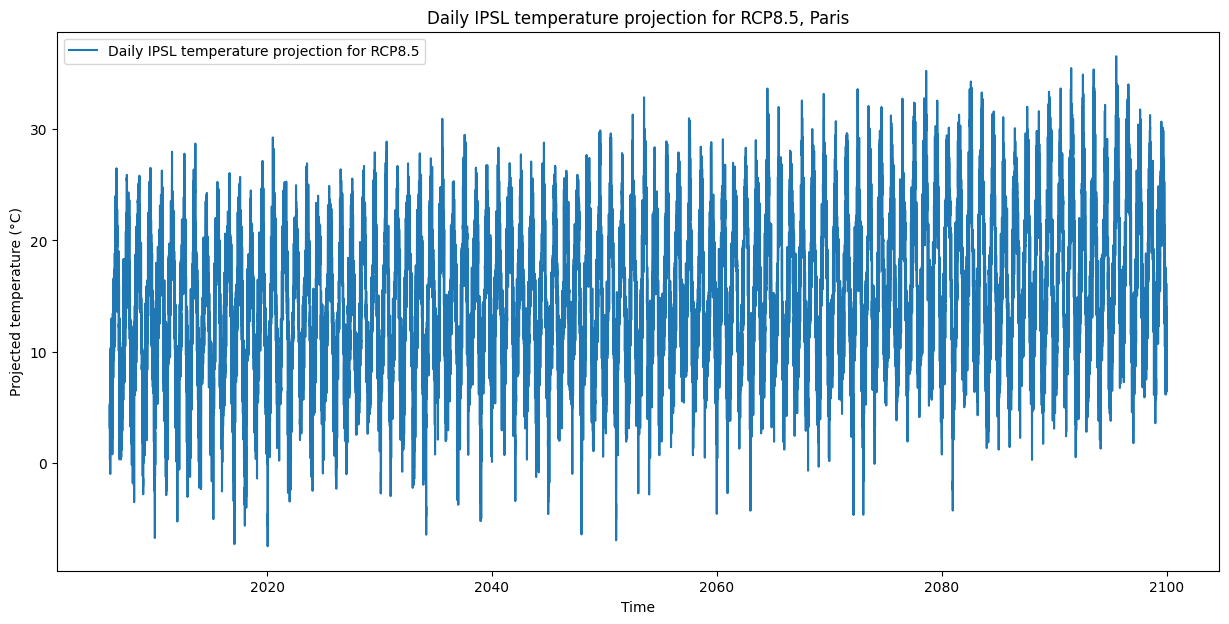

In [208]:
# Lire le fichier CSV
file_path = 'data/paris_2006_2100_rcp85.csv'
dfs_projparis = pd.read_csv(file_path, delimiter = ",", index_col=0)
dfs_projparis.index = pd.to_datetime(dfs_projparis.index)
dfs_projparis["months"] = dfs_projparis.index.month

# Set dates - MODIFY HERE TO VARY THE CYCLES
start_time = pd.to_datetime("2006-01-01") 
end_time = pd.to_datetime("2100-01-01")  

# Filtrage des valeurs de ta entre les deux dates spécifiées
filtered_dfs_projparis = dfs_projparis[(dfs_projparis.index >= start_time) & (dfs_projparis.index < end_time)]

# Extraction des valeurs de ta
tas_filtered = filtered_dfs_projparis['temperature_K'].values - 273.15

plt.figure(figsize=(15, 7))
plt.plot(filtered_dfs_projparis.index, tas_filtered, label='Daily IPSL temperature projection for RCP8.5')
plt.xlabel('Time')
plt.ylabel('Projected temperature (°C)')
plt.title('Daily IPSL temperature projection for RCP8.5, Paris')
plt.legend()
plt.show()

In [209]:
def every_yr_hw_proj(start_date, end_date, dfs, thresh, N):
    # Génération du DatetimeIndex
    date_range = pd.date_range(start=start_date, end=end_date, freq='YS') 

    nbhw_dys = []

    for i in range(len(date_range)-1):
        start_time = date_range[i]
        end_time = date_range[i+1]
        filtered_dfs = dfs[(dfs.index >= start_time) & (dfs.index < end_time)]
        tas = filtered_dfs['temperature_K'].values - 273.15
        hwevents_max = detect_heatwaves(tas, thresh, N)
        nbhw_dys.append(sum(hwevents_max))

    plt.plot(date_range[:-1], nbhw_dys)
    plt.title(f"Number of heatwave days per year for a threshold of {thresh}°C overpassed for {N} consecutive days, for the period {start_date}/{end_date}")
    plt.show()


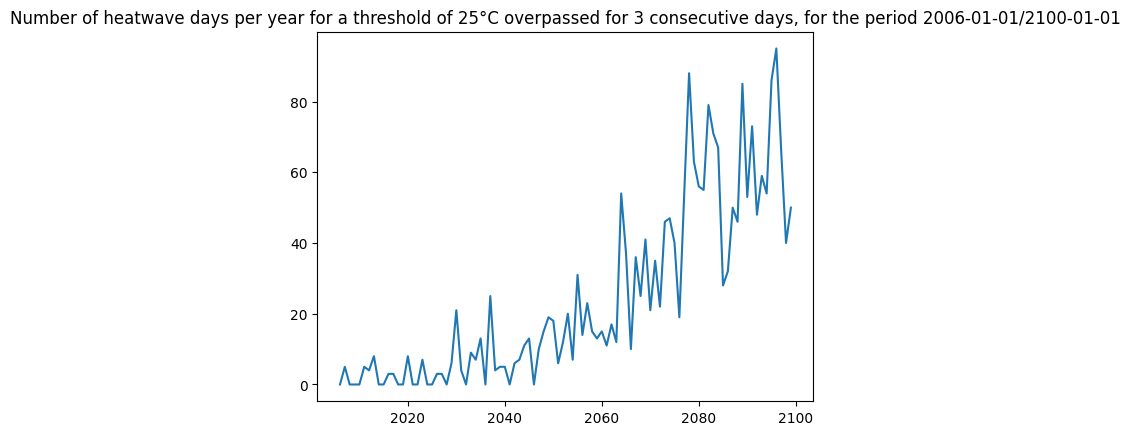

In [210]:
thresh = 25
N = 3

# Définition des dates de début et de fin
start_date = "2006-01-01"
end_date = "2100-01-01"
every_yr_hw_proj(start_date, end_date, dfs_projparis, thresh, N)

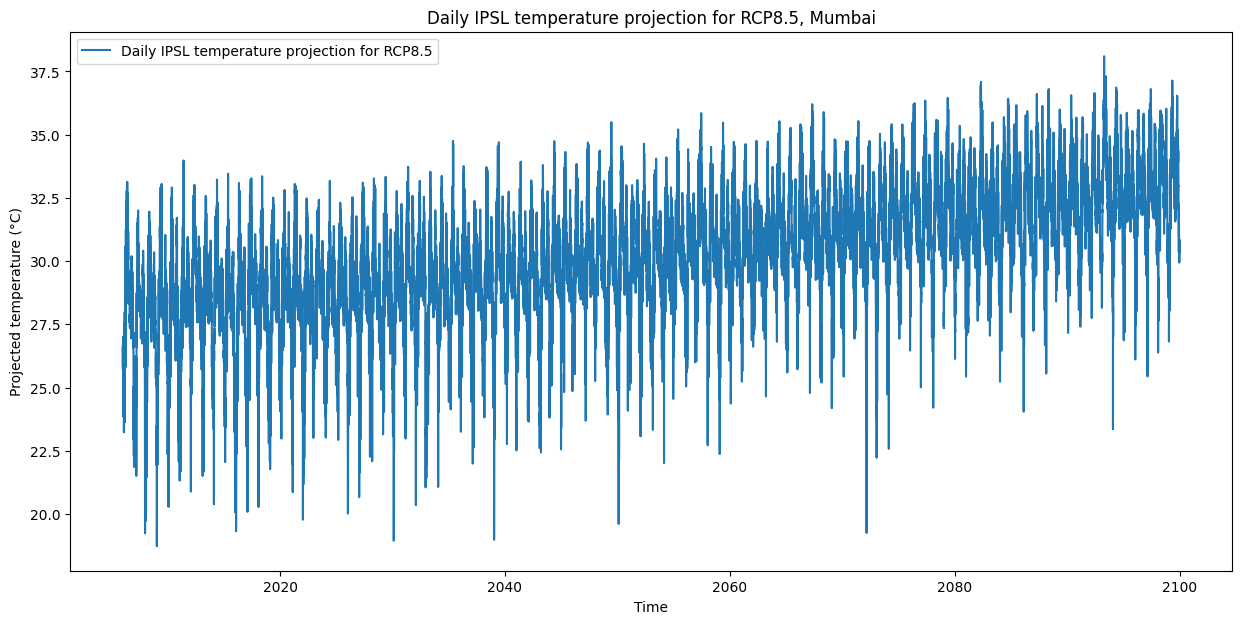

In [211]:
# Lire le fichier CSV
file_path = 'data/mumbai_2006_2100_rcp85.csv'
dfs_projmumbai = pd.read_csv(file_path, delimiter = ",", index_col=0)
dfs_projmumbai.index = pd.to_datetime(dfs_projmumbai.index)
dfs_projmumbai["months"] = dfs_projmumbai.index.month

# Set dates - MODIFY HERE TO VARY THE CYCLES
start_time = pd.to_datetime("2006-01-01") 
end_time = pd.to_datetime("2100-01-01")  

# Filtrage des valeurs de ta entre les deux dates spécifiées
filtered_dfs_projmumbai = dfs_projmumbai[(dfs_projmumbai.index >= start_time) & (dfs_projmumbai.index < end_time)]

# Extraction des valeurs de ta
tas_filtered = filtered_dfs_projmumbai['temperature_K'].values - 273.15

plt.figure(figsize=(15, 7))
plt.plot(filtered_dfs_projmumbai.index, tas_filtered, label='Daily IPSL temperature projection for RCP8.5')
plt.xlabel('Time')
plt.ylabel('Projected temperature (°C)')
plt.title('Daily IPSL temperature projection for RCP8.5, Mumbai')
plt.legend()
plt.show()

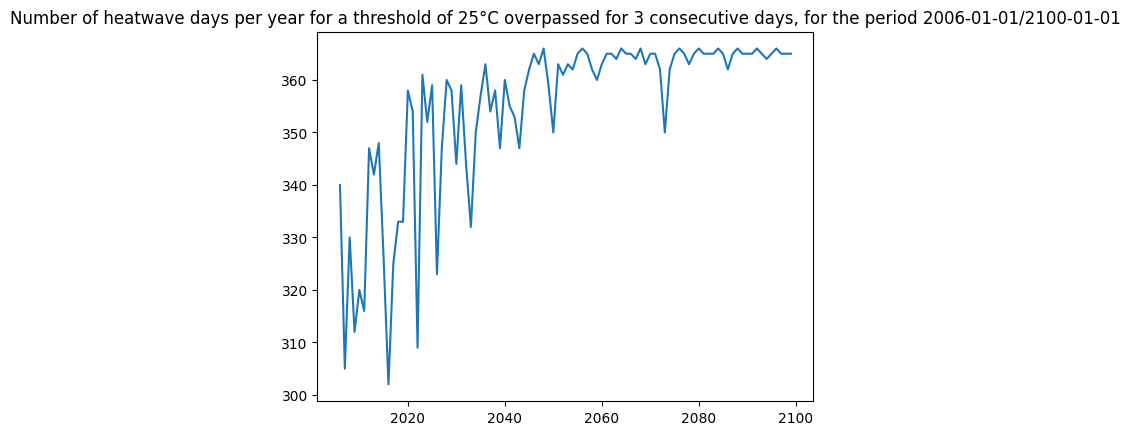

In [212]:
thresh = 25
N = 3

# Définition des dates de début et de fin
start_date = "2006-01-01"
end_date = "2100-01-01"
every_yr_hw_proj(start_date, end_date,dfs_projmumbai, thresh, N)

## 5) Go further

As you can see, the single temperature threshold is not necessarily relevant to understanding the influence of heat waves on living organisms, which have already become accustomed to local temperatures. How can we adapt the calculation of the number of heatwave days per year, taking into account past data?

Suggérer à partir des manipulations classe -> se positionner avec un seuil spatial-dépendant ET mois-dépendant. Mettre en place la visualisation, donner à voir le décalage temporel, suggérer les quantiles. Récupérer les données historiques sur ces deux points dans ISIMIP.

In [213]:
print(dfh)

# Calcul du 95e percentile de la colonne 'ta'
percentile_95 = dfh['ta'].quantile(0.95)

# Affichage du résultat
print(f"Le 95e percentile de la température mesurée est: {percentile_95 - 273.15}°C")

                  ta
0                   
1971-01-01  278.1347
1971-01-02  279.4654
1971-01-03  281.8556
1971-01-04  279.8799
1971-01-05  281.4799
...              ...
2000-12-27  281.7254
2000-12-28  278.1145
2000-12-29  273.8149
2000-12-30  272.5299
2000-12-31  276.8929

[10958 rows x 1 columns]
Le 95e percentile de la température mesurée est: 21.881129999999985°C


If you take a certain percentile as a threshold during the whole year, you only take into account abnormally hot days for the whole year, but not during a given period. For example, winter days will never experience "hot days" according to this definition. But abnormally hot days compared to cold temperature, even if the absolute value stay low, can have significant impact on plant development, through the modification of the phenology, for example. How would you take into account this seasonal dependence ?

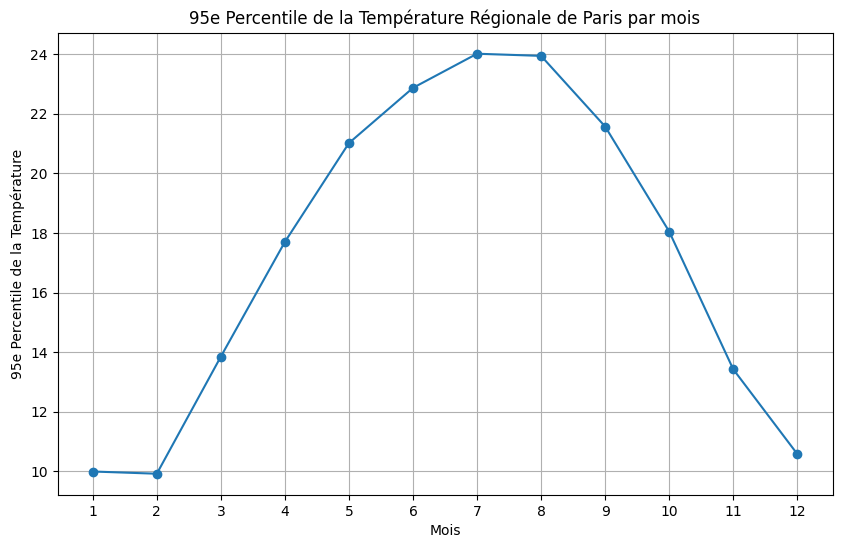

    months  95percentile
0        1      9.994190
1        2      9.919905
2        3     13.850200
3        4     17.701135
4        5     21.017265
5        6     22.869250
6        7     24.015095
7        8     23.942455
8        9     21.571085
9       10     18.046800
10      11     13.424745
11      12     10.581935
Index(['months', '95percentile'], dtype='object')


In [214]:
def calculate_monthly_percentile_95(df,region="region"):
    # Créer une colonne 'month' dans le DataFrame
    df['month'] = df.index.month

    # Calculer le 95e percentile pour chaque mois
    monthly_percentile_95 = df.groupby('month')['ta'].quantile(0.95) - 273.15

    # Transformer le résultat en DataFrame et renommer les colonnes
    monthly_percentile_95 = monthly_percentile_95.reset_index()
    monthly_percentile_95.columns = ['months', '95percentile']
    
    # Afficher la courbe des 95e percentiles par mois
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_percentile_95['months'], monthly_percentile_95['95percentile'], marker='o')
    plt.title(f'95e Percentile de la Température Régionale de {region} par mois')
    plt.xlabel('Mois')
    plt.ylabel('95e Percentile de la Température')
    plt.xticks(range(1,13))
    plt.grid(True)
    plt.show()

    return monthly_percentile_95

# Appeler la fonction et obtenir les résultats
monthly_percentile_95P = calculate_monthly_percentile_95(dfh, region = "Paris")
print(monthly_percentile_95P)
print(monthly_percentile_95P.columns)

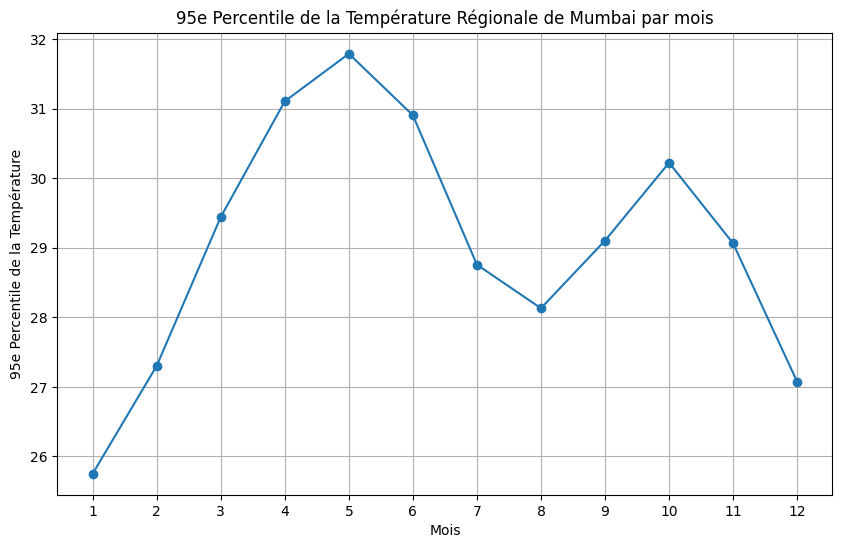

In [215]:
# Lire le fichier CSV
file_path = 'data/mumbai_1970_2000.csv'
dfh2 = pd.read_csv(file_path, delimiter = ",", index_col=0)
dfh2.index = pd.to_datetime(dfh2.index)
dfh2.columns = ['ta']


# Appeler la fonction et obtenir les résultats
monthly_percentile_95M = calculate_monthly_percentile_95(dfh2, region = "Mumbai")

Finally, we can recode the detect_heatwaves function by adding this additional notion of moving threshold, and adapt the results constructed above to a simpler situation on SIRTA data.

In [216]:
def detect_heatwaves_movingthresh(projdf, quant, nb_days):
    """
    Detect heatwave events in the daily temperature array.

    Parameters:
    projdf (list or array-like): df of projected temperatures
    quant (float or int): df of moving thresholds
    nb_days (int): The minimum number of consecutive days for an event to be considered a heatwave.
    Returns:
    list: A list of 0s and 1s where 1 indicates a day that is part of a heatwave event.
    """
    heatwave_events = [0] * len(projdf)
    consecutive_days = 0

    for i, (date, row) in enumerate(projdf.iterrows()):
        if row['temperature_K'] > quant.loc[int(row["months"])-1,"95percentile"] + 273.15:
            consecutive_days += 1
        else:
            if consecutive_days >= nb_days:
                for j in range(i - consecutive_days, i):
                    heatwave_events[j] = 1
            consecutive_days = 0

    # Check at the end of the array
    if consecutive_days >= nb_days:
        for j in range(len(projdf) - consecutive_days, len(projdf)):
            heatwave_events[j] = 1

    return heatwave_events


def every_yr_hw_moving(start_date, end_date, projdf, quant, N):
    # Génération du DatetimeIndex
    date_range = pd.date_range(start=start_date, end=end_date, freq='YS') 

    nbhw_dys = []

    for i in range(len(date_range)-1):
        start_time = date_range[i]
        end_time = date_range[i+1]
        filtered_dfs = projdf[(projdf.index >= start_time) & (projdf.index < end_time)]
        hwevents_max = detect_heatwaves_movingthresh(filtered_dfs, quant, N)
        nbhw_dys.append(sum(hwevents_max))

    plt.plot(date_range[:-1], nbhw_dys)
    plt.title(f"Number of heatwave days per year for a threshold of 95th percentile overpassed for {N} consecutive days, for the period {start_date}-{end_date}")
    plt.show()


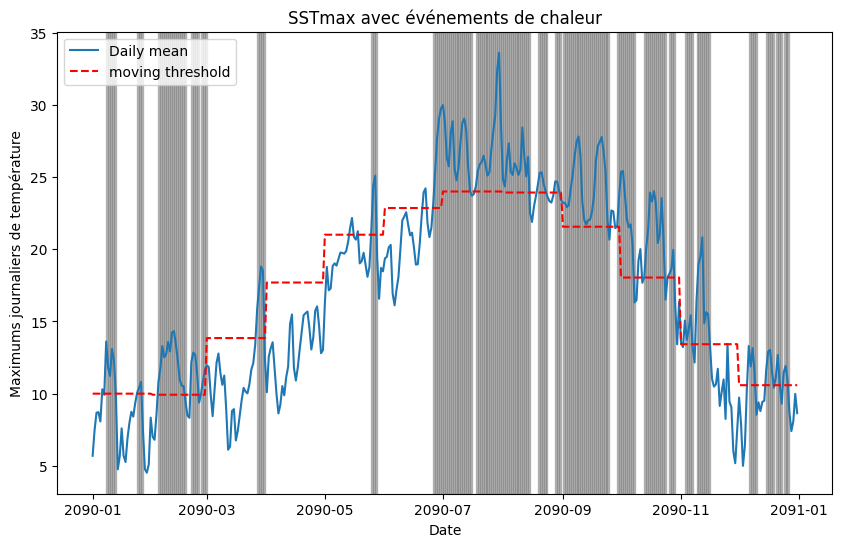

In [217]:
# Set dates - MODIFY HERE TO VARY THE CYCLES
start_time = pd.to_datetime("2090-01-01") 
end_time = pd.to_datetime("2091-01-01")



# Filtrage des valeurs de ta entre les deux dates spécifiées
filtered_dfs_projparis = dfs_projparis[(dfs_projparis.index >= start_time) & (dfs_projparis.index < end_time)]
tas = ta_filtered
ta_filtered_paris = filtered_dfs_projparis['temperature_K'].values - 273.15
dates = filtered_dfs_projparis.index


# Joindre les dataframes sur la colonne "month"
merged_df = pd.merge(filtered_dfs_projparis, monthly_percentile_95P, on='months')

# Ajouter la colonne "threshold" en copiant les valeurs de "95percentile"
merged_df['threshold'] = merged_df['95percentile']

# Si vous voulez enlever la colonne "95percentile" après la copie
merged_df.drop(columns=['95percentile'], inplace=True)

hwevents_max = detect_heatwaves_movingthresh(filtered_dfs_projparis,monthly_percentile_95P, 3)


# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(10, 6))

# Tracé des valeurs
ax.plot(dates, ta_filtered_paris, label='Daily mean')

# Ajout des zones grisées pour les jours avec événements (hwevents_max == 1)
for i, event in enumerate(hwevents_max):
    if event == 1:
        ax.axvspan(dates[i], dates[i] + pd.Timedelta(days=1), color='gray', alpha=0.5)
#ax.axhline(y=thresh, color='red', linestyle='--', label=f'Threshold ({thresh}°C)')
ax.plot(dates, merged_df["threshold"], color='red', linestyle='--', label=f'moving threshold')
# Ajout des labels et de la légende
ax.set_xlabel('Date')
ax.set_ylabel('Maximums journaliers de température')
ax.set_title('SSTmax avec événements de chaleur')
ax.legend()

# Affichage du graphique
plt.show()

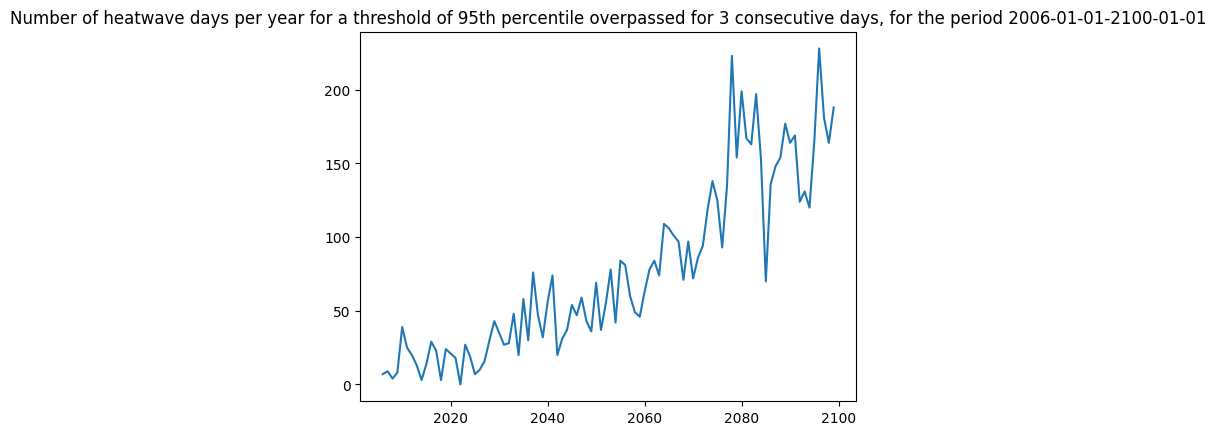

In [218]:
quant = monthly_percentile_95P
N = 3

# Définition des dates de début et de fin
start_date = "2006-01-01"
end_date = "2100-01-01"
every_yr_hw_moving(start_date, end_date, projdf = dfs_projparis, quant=quant, N=N) 

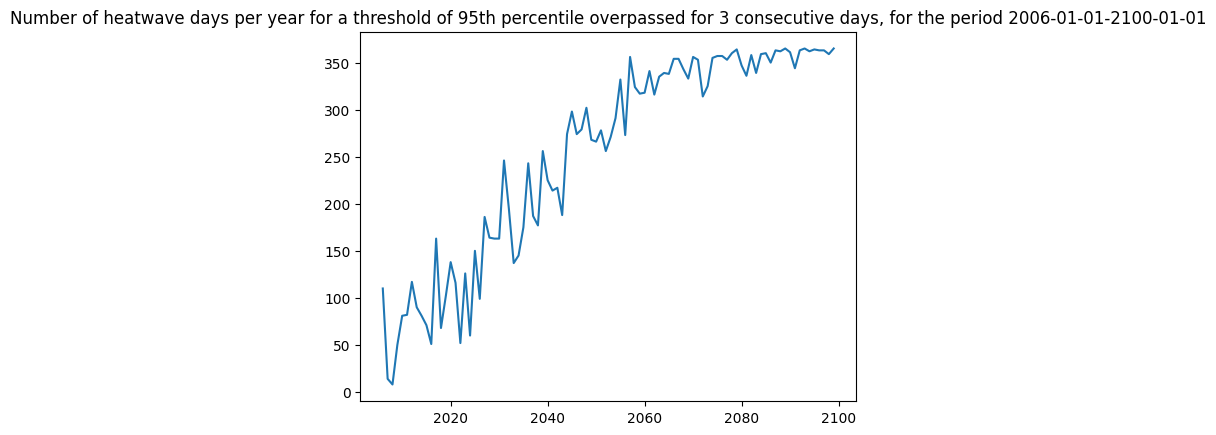

In [219]:
quant = monthly_percentile_95M
N = 3

# Définition des dates de début et de fin
start_date = "2006-01-01"
end_date = "2100-01-01"
every_yr_hw_moving(start_date, end_date, projdf = dfs_projmumbai, quant=quant, N=N) 